In [1]:
import numpy as np  # arrays
import matplotlib.pyplot as plt  # 2d plotting
from mpl_toolkits.mplot3d import axes3d  # 3d plotting

In [2]:
f = lambda x, y: 100*(y-x**2)**2 + (1-x)**2 # the y here is x2 in the problem
f(1,1)

0

In [3]:
X = np.linspace(-2,2,300)
Y = np.linspace(-2,3,300)
Xmesh, Ymesh = np.meshgrid(X,Y)  # creates 300x300 grid of points defined by X and Y above
Z = f(Xmesh, Ymesh)  # evaluate f at each of the 300x300 points

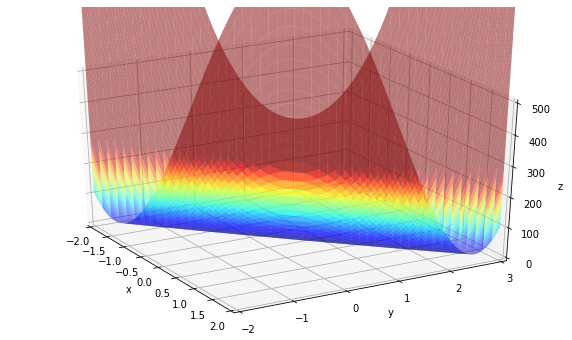

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d', elev=30, azim=-30)
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5, vmax=250)
ax.set(xlabel='x', ylabel='y', zlabel='z', xlim=[-2,2], ylim=[-2,3], zlim=[0, 500])
plt.show()

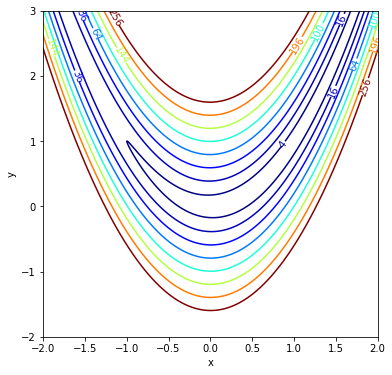

In [43]:
plt.figure(figsize=(6, 6)) 
CS = plt.contour(Xmesh, Ymesh, Z, np.arange(2,18,2)**2, cmap='jet', vmax=250)
plt.clabel(CS,inline_spacing=0,fmt='%d') 
plt.axis([-2,2,-2,3]) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

In [26]:
f2 = lambda x, y: 8*x + 12*y + x**2 - 2*y**2

In [69]:
X2 = np.linspace(-10,10,300)
Y2 = np.linspace(-10,10,300)
Xmesh, Ymesh = np.meshgrid(X2,Y2)  # creates 300x300 grid of points defined by X and Y above
Z2 = f2(Xmesh, Ymesh)

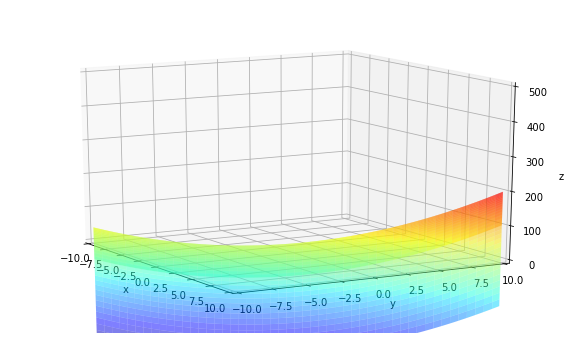

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d', elev=15, azim=-30)
ax.plot_surface(X2, Y2, Z2, cmap='jet', alpha=0.5, vmax=250)
ax.set(xlabel='x', ylabel='y', zlabel='z', xlim=[-10,10], ylim=[-10,10], zlim=[0, 500])
plt.show()

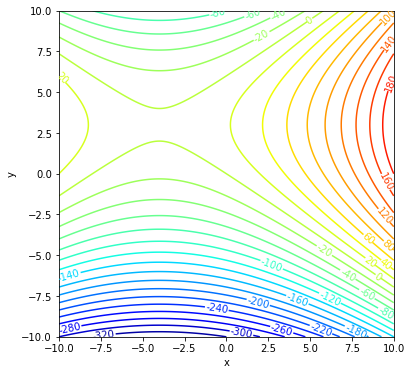

In [72]:
plt.figure(figsize=(6, 6)) 
CS = plt.contour(Xmesh, Ymesh, Z2, 30, cmap='jet', vmax=250)
plt.clabel(CS,inline_spacing=0,fmt='%d') 
plt.axis([-10,10,-10,10]) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

In [76]:
from numpy.linalg import norm
import time

In [77]:
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [78]:
def QObjFunc(x): # f
    return 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
def QGradObjFunc(x): # gradient of f
    return np.array([400*x[0]**3 - 400*x[0]*x[1] + 2*x[0] - 2, -200*x[0]**2 + 200*x[1]])

Found the minimizer at [1.00000001 1.00000002] with 40801 iterations successfully, gradient's norm is 9.997849209810188e-09.
Took 0.5079 seconds


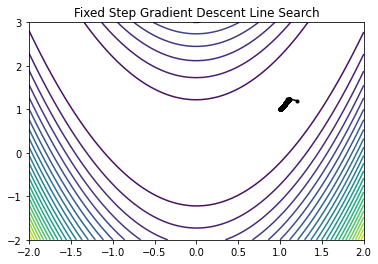

In [60]:
alpha = 1e-3
tol = 1e-8
x0 = np.array([1.2, 1.2])
maxIter = 1e6

tic = time.perf_counter()
x_2, iter_2, path_2 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc, alpha, x0, tol, maxIter)
toc = time.perf_counter()
print("Took {:.4f} seconds".format(toc - tic))
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 3, 300)
X, Y = np.meshgrid(x, y)
Z = QObjFunc([X,Y])
plt.contour(X, Y, Z, 25);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_2[:,0],path_2[:,1],'-k', marker='.')
plt.show()

In [63]:
larger_alpha = 3e-3
x_3, iter_3, path_3 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc, larger_alpha, x0, tol, maxIter)

Unable to locate minimizer within maximum iterations, last position is at [1.98509969e+235 3.89539917e+156], gradient's norm is nan


<ipython-input-12-9c11d81ea0c4>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([400*x[0]**3 - 400*x[0]*x[1] + 2*x[0] - 2, -200*x[0]**2 + 200*x[1]])
<ipython-input-12-9c11d81ea0c4>:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([400*x[0]**3 - 400*x[0]*x[1] + 2*x[0] - 2, -200*x[0]**2 + 200*x[1]])


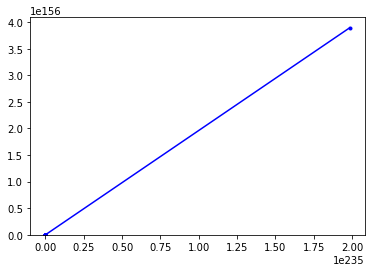

In [64]:
plt.contour(X, Y, Z, 25);
plt.plot(path_3[:,0],path_3[:,1],'-b', marker='.')
plt.show()

Found the minimizer at [0.99999999 0.99999998] with 43605 iterations successfully, gradient's norm is 9.999079369299886e-09.
Took 0.5847 seconds


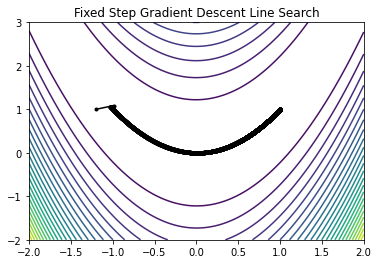

In [57]:
new_x0 = np.array([-1.2, 1])
# everything else stays the same
tic = time.perf_counter()
x_2, iter_2, path_2 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc, alpha, new_x0, tol, maxIter)
toc = time.perf_counter()
print("Took {:.4f} seconds".format(toc - tic))
plt.contour(X, Y, Z, 25);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_2[:,0],path_2[:,1],'-k', marker='.')
plt.show()

Unable to locate minimizer within maximum iterations, last position is at [0.46330448 0.2853615 ], gradient's norm is 20.02504713000394


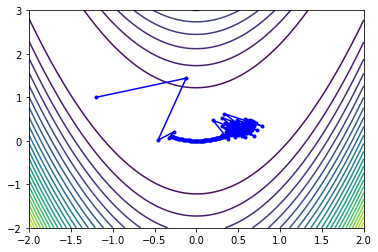

In [59]:
#larger_alpha is 5e-3
x_3, iter_3, path_3 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc, larger_alpha, new_x0, tol, maxIter)
plt.contour(X, Y, Z, 25);
plt.plot(path_3[:,0],path_3[:,1],'-b', marker='.')
plt.show()